# How to plot results

Pyleecan has generic built-in plot methods which allow to easily plot:
- **simulated** or **experimental** fields (unit conversions supported)
- **slices** (normalizations available)
- **Fourier Transforms**
but also to **compare** on the same graph a list of fields.

This flexibility is provided by the [`SciDataTool` module](https://github.com/Eomys/SciDataTool), which has been created to **ease the handling of scientific data**, and considerately simplify plot commands. It unifies the extraction of relevant data (e.g. slices), whether they are stored in the time/space or in the frequency domain. The call to Fourier Transform functions is **transparent**, although it still can be parameterized.

This tutorial explains how to use Pyleecan's **plot commands**. It is available on [GitHub](https://github.com/Eomys/pyleecan/tree/master/Tutorials/tuto_Plots.ipynb). For more details on the `SciDataTool` package, please refer to the specific [tutorials](https://github.com/Eomys/SciDataTool/tree/master/SciDataTool/Tutorials).

The following example demonstrates the syntax to **quickly plot a field with its Fourier Transform** (airgap radial flux density):

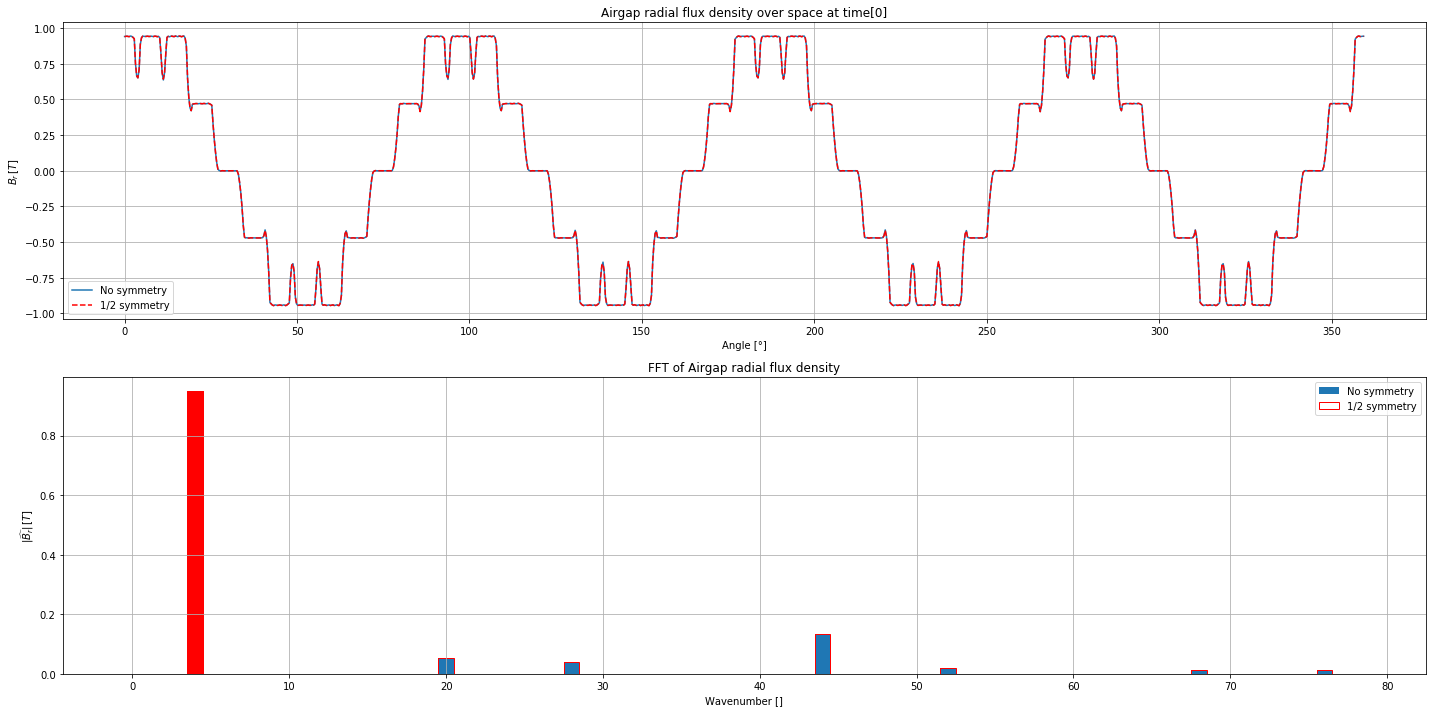

In [2]:
%matplotlib inline
# Add Pyleecan to the Python path
import sys
sys.path.append('../..')
import matplotlib.pyplot as plt
plt.ioff()

from numpy import ones, pi, array

# Import Pyleecan modules
from pyleecan.Classes.Simu1 import Simu1
from pyleecan.Tests.Validation.Machine.IPMSM_xxx import IPMSM_xxx

from pyleecan.Classes.InCurrent import InCurrent
from pyleecan.Classes.ImportGenVectLin import ImportGenVectLin
from pyleecan.Classes.ImportMatrixVal import ImportMatrixVal

from pyleecan.Classes.MagFEMM import MagFEMM
from pyleecan.Classes.Output import Output

simu = Simu1(name="EM_IPMSM_FL_001", machine=IPMSM_xxx)

# Definition of the enforced output of the electrical module
Nr = ImportMatrixVal(value=ones(4) * 3000)
Is = ImportMatrixVal(
    value=array(
        [
            [6.97244193e-06, 2.25353053e02, -2.25353060e02],
            [-2.60215295e02, 1.30107654e02, 1.30107642e02],
            [-6.97244208e-06, -2.25353053e02, 2.25353060e02],
            [2.60215295e02, -1.30107654e02, -1.30107642e02],
        ]
    )
)
time = ImportGenVectLin(start=0, stop=0.015, num=4, endpoint=True)
angle = ImportGenVectLin(start=0, stop=2 * pi, num=1024, endpoint=False)

simu.input = InCurrent(
    Is=Is,
    Ir=None,  # No winding on the rotor
    Nr=Nr,
    angle_rotor=None,  # Will be computed
    time=time,
    angle=angle,
    angle_rotor_initial=0.5216 + pi,
)

# Definition of the magnetic simulation (no symmetry)
simu.mag = MagFEMM(
    is_stator_linear_BH=2, is_rotor_linear_BH=2, is_symmetry_a=False, is_antiper_a=True
)
simu.struct = None
# Copy the simu and activate the symmetry
simu_sym = Simu1(init_dict=simu.as_dict())
simu_sym.mag.is_symmetry_a = True
simu_sym.mag.sym_a = 4
simu_sym.mag.is_antiper_a = False

# Run the simulations
out = Output(simu=simu)
out.post.legend_name = "No symmetry"
simu.run()

out2 = Output(simu=simu_sym)
out2.post.legend_name = "1/2 symmetry"
out2.post.line_color = "r--"
simu_sym.run()

#------------------------------------------------------
# Plot the results comparing the two simulations
plt.ion()
r_max = 78
out.plot_A_space(
    "mag.Br", is_fft=True, r_max=r_max, out_list=[out2]
)
#------------------------------------------------------

## 1. The existing plot commands and their options

There are for the time being 7 plot commands:

- `plot_A_space`: field as a function of the angle
- `plot_A_time`: field as a function of time
- `plot_A_surf`: 3D surface in time/space domain
- `plot_A_time_space`: 3D surface + angle + time
- `plot_A_nthoct`: spectrum in the $1/n^{\text{th}}$ octave band
- `plot_A_cfft2`: 3D stem plot of the 2D Fourier Transform
- `plot_A_fft2`: pcolor plot of the 2D Fourier Transform